In [1]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colorbar, colors
from matplotlib.cm import get_cmap
from matplotlib.patches import Rectangle
import seawater
import glob

In [2]:
# %%time
# files = glob.glob("/expanse/lustre/projects/cos100/slevy1/icelandBGCdata/*.nc")

In [3]:
# %time
# variable_1 = 'Alk'
# variable_2 =  'DIC'
# datasets = []
# for f in files:
#     x = xr.open_dataset(f)
#     x_new = x[[variable_1, variable_2]]
#     datasets.append(x_new)
# combined_ds = xr.concat(datasets,dim='time')
    
    

In [4]:
# ds = xr.open_mfdataset("/expanse/lustre/projects/cos100/slevy1/icelandBGCdata/*.nc", combine='nested', concat_dim=["time"])
# # x=xr.open_mfdataset('/expanse/lustre/projects/cos100/uheede/roms/run/Iceland4_BGC_alk/Iceland4_BGC_alk_rnd.2012062[2-3]150000.nc', combine='nested', concat_dim=["time"])
# x = ds[['Alk','DIC']]

In [5]:
%%time
variable_1 = 'Alk'
variable_2 =  'DIC'
def preprocess(ds):
    return ds[[variable_1,variable_2]]
x = xr.open_mfdataset("/expanse/lustre/projects/cos100/slevy1/icelandBGCdata/*.nc", combine='nested', concat_dim=["time"], preprocess=preprocess, chunks={})


CPU times: user 991 ms, sys: 1.07 s, total: 2.06 s
Wall time: 2.82 s


In [6]:
print(x.data_vars)

Data variables:
    Alk      (time, depth, eta_rho, xi_rho) float32 81GB dask.array<chunksize=(24, 40, 722, 722), meta=np.ndarray>
    DIC      (time, depth, eta_rho, xi_rho) float32 81GB dask.array<chunksize=(24, 40, 722, 722), meta=np.ndarray>


In [7]:
%%time
dslice = x.where(x['Alk'] != 0)
dslice = dslice.sel(eta_rho=slice(502,522), xi_rho=slice(595,610)).mean(dim=('time', 'xi_rho', 'eta_rho'))

CPU times: user 13.6 ms, sys: 0 ns, total: 13.6 ms
Wall time: 13.7 ms


CPU times: user 2min 55s, sys: 5min 10s, total: 8min 6s
Wall time: 5min 47s


<function matplotlib.pyplot.show(close=None, block=None)>

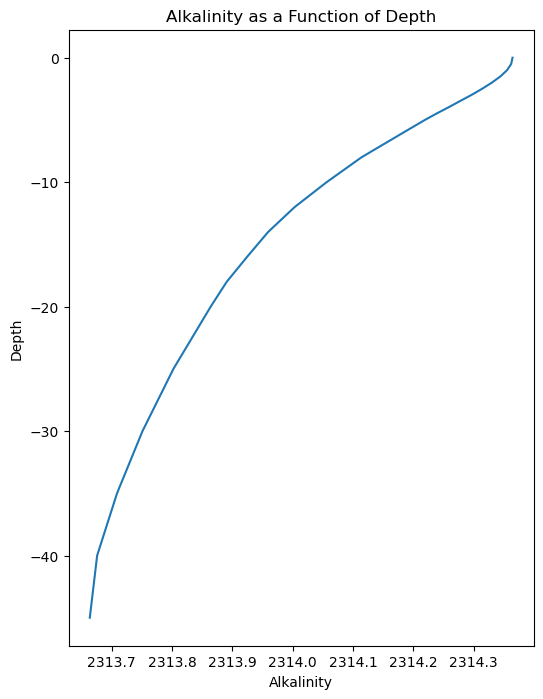

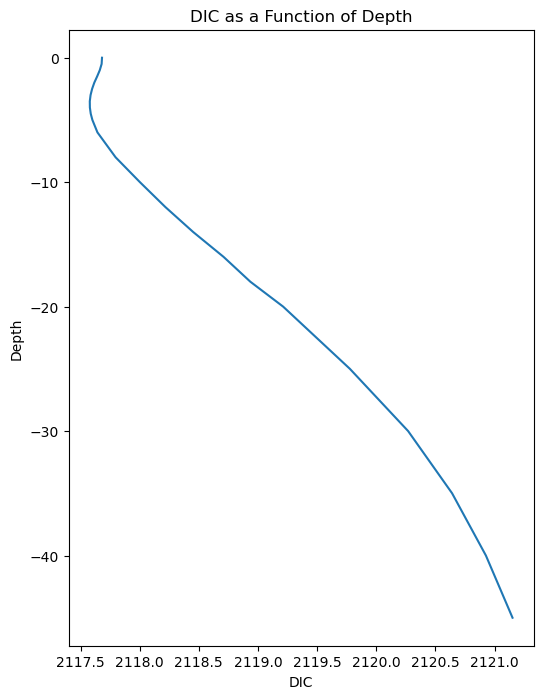

In [8]:
%%time
alkalinity = dslice['Alk']
depth = dslice['depth']
DIC = dslice['DIC']

# Create a plot of alkalinity vs. depth
plt.figure(figsize=(6, 8))
plt.plot(alkalinity, depth)


plt.xlabel('Alkalinity')
plt.ylabel('Depth')
plt.title('Alkalinity as a Function of Depth')
plt.show

plt.figure(figsize=(6, 8))
plt.plot(DIC, depth)

plt.xlabel('DIC')
plt.ylabel('Depth')
plt.title('DIC as a Function of Depth')
plt.show

In [9]:
%%time
top = x.sel(depth=0).mean(dim='time')
top = top.where(top['Alk'] != 0)


CPU times: user 5.75 ms, sys: 2.61 ms, total: 8.36 ms
Wall time: 8.82 ms


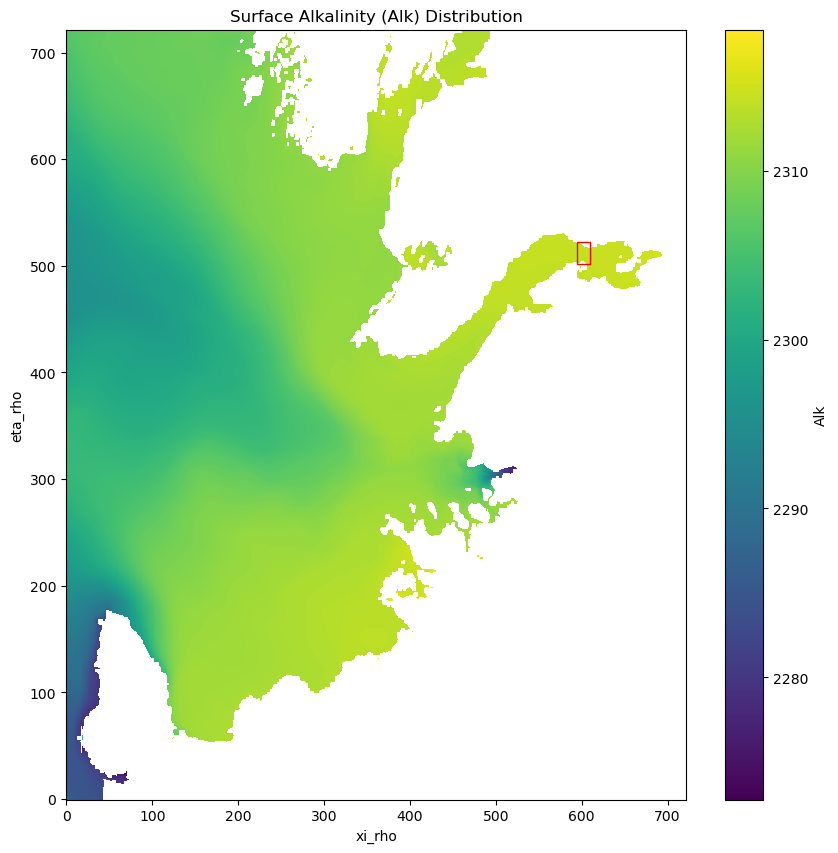

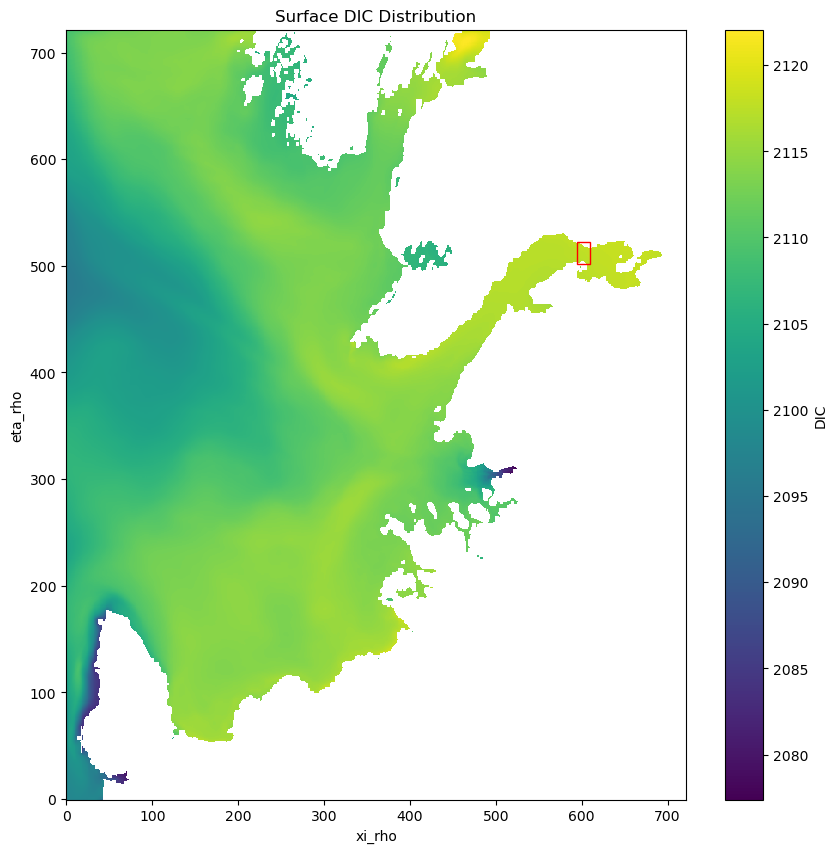

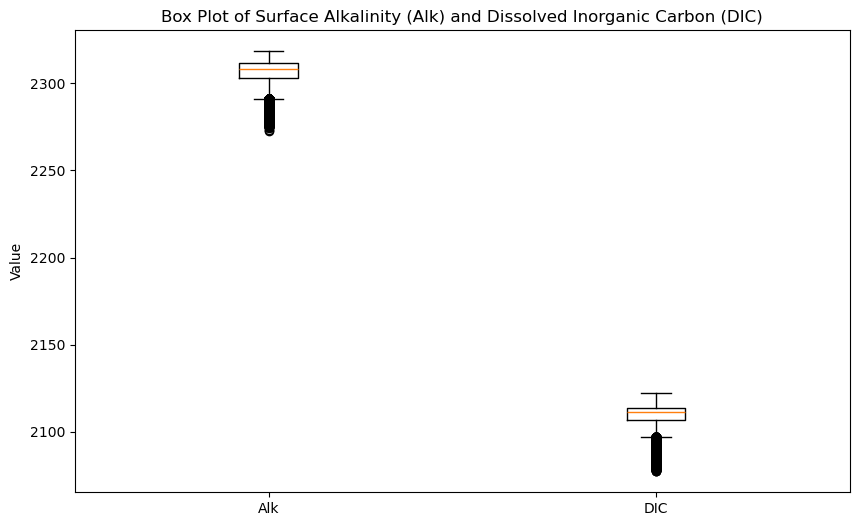

CPU times: user 12.5 s, sys: 5min 27s, total: 5min 39s
Wall time: 5min 49s


In [10]:
%%time
alk_surface = top['Alk']
dic_surface = top['DIC']

rectangle_alk = Rectangle((595, 502), 15, 20, linewidth=1, edgecolor='r', facecolor='none')

# Create the plot
plt.figure(figsize=(10, 10))
alk_surface.plot(x='xi_rho', y='eta_rho')
plt.title('Surface Alkalinity (Alk) Distribution')
plt.xlabel('xi_rho')
plt.ylabel('eta_rho')
plt.gca().add_patch(rectangle_alk)
plt.show()

rectangle_dic = Rectangle((595, 502), 15, 20, linewidth=1, edgecolor='r', facecolor='none')

# Create the plot
plt.figure(figsize=(10, 10))
dic_surface.plot(x='xi_rho', y='eta_rho')
plt.title('Surface DIC Distribution')
plt.xlabel('xi_rho')
plt.ylabel('eta_rho')
plt.gca().add_patch(rectangle_dic)
plt.show()

alk_flat = alk_surface.values.flatten()
alk_flat_clean = alk_flat[~np.isnan(alk_flat)]
dic_flat = dic_surface.values.flatten()
dic_flat_clean = dic_flat[~np.isnan(dic_flat)]

data_to_plot = [alk_flat_clean, dic_flat_clean]

plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['Alk', 'DIC'])
plt.title('Box Plot of Surface Alkalinity (Alk) and Dissolved Inorganic Carbon (DIC)')
plt.ylabel('Value')
plt.show()